In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

In [3]:
X = train.drop('label',1)
y = train['label']

In [4]:
s = pd.read_csv('sample_submission.csv')

In [5]:
X = X.astype('float32') / 255.0
# y = y.astype('float32') / 255.0

X = X.values.reshape(-1,28,28,1)
# y = y.values.reshape(-1,28,28,1)


# x_train = np.expand_dims(x_train,-1)
# y_train = np.expand_dims(y_train,-1)

# x_test = keras.utils.to_categorical(x_test, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

# x_test = np.expand_dims(x_test,-1)
# y_test = np.expand_dims(y_test,-1)

In [6]:
print(X.shape)

(42000, 28, 28, 1)


AxesImage(54,36;334.8x217.44)


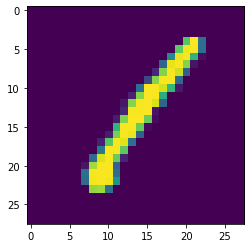

In [7]:
print(plt.imshow(X[0]))

In [8]:
print(X.shape)
print(y.shape)
# print(x_test.shape)
# print(y_test.shape)

(42000, 28, 28, 1)
(42000,)


In [9]:
# test = test.astype('float32') / 255.0
# test = test.values.reshape(-1,28,28,1)

In [10]:
model = keras.Sequential(
[
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

In [ ]:
batch_size = 250
epochs = 7

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

model.fit(X, y,batch_size=batch_size,epochs=epochs)

Train on 42000 samples
Epoch 1/7
42000/42000 [==============================] - 142s 3ms/sample - loss: 0.0221 - accuracy: 0.9934
Epoch 2/7
42000/42000 [==============================] - 149s 4ms/sample - loss: 0.0179 - accuracy: 0.9947
Epoch 3/7
42000/42000 [==============================] - 129s 3ms/sample - loss: 0.0166 - accuracy: 0.9946
Epoch 4/7
42000/42000 [==============================] - 112s 3ms/sample - loss: 0.0149 - accuracy: 0.9951
Epoch 5/7
42000/42000 [==============================] - 100s 2ms/sample - loss: 0.0119 - accuracy: 0.9968
Epoch 6/7
16500/42000 [==========>...................] - ETA: 1:01 - loss: 0.0108 - accuracy: 0.9965

In [ ]:
import os,cv2

a = []

# Load in the images
for filepath in os.listdir('../DR av/Images/Test'):
    a.append(cv2.imread('../DR av/Images/Test/{0}'.format(filepath),0))
    
# print(a[54])

In [ ]:
# plt.imshow(a[24])

In [ ]:
a = np.array(a)

In [ ]:
a = a.reshape(-1,28,28,1)

In [ ]:
a.shape

In [ ]:
results = model.predict(a)

In [ ]:
print(results[5])

In [ ]:
fp = np.argmax(results,axis = 1)

In [ ]:
print(fp[27])

In [ ]:
print(fp)

In [ ]:
submission = pd.DataFrame({
        "filename": s["filename"],
        "label": fp
    })

submission.to_csv('SubmissionDR2.csv', index=False)

In [24]:
# test.shape

In [25]:
# results = model.predict(test)

# select the indix with the maximum probability
# results = np.argmax(results,axis = 1)

# results = pd.Series(results,name="Label")

In [26]:
# for i in results:
#     print(i)

In [27]:
# submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

# submission.to_csv("n.csv",index=False)

In [28]:
# # fig = plt.figure(figsize=(10,10))
# col = 5
# row = 4
# for i in range(1,10):
#     fig.add_subplot(row , col,i)
#     a = test[i]
#     plt.imshow(a)
# plt.show()